# ECSimpleSnow component

ECSimpleSnow is an empirical algorithm to melt snow according to the surface temperature and increase snow depth according to the precipitation that has fallen since the last time step.

## Details: 

**Brown, R. D., Brasnett, B., & Robinson, D. (2003). Gridded North American monthly snow depth and snow water equivalent for GCM evaluation. Atmosphere-Ocean, 41(1), 1-14.**

**URL:** https://www.tandfonline.com/doi/abs/10.3137/ao.410101

## Source code in Fortran:

**URL:** https://github.com/permamodel/Snow_BMI_Fortran


### load module

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import pymt.models
ec = pymt.models.ECSimpleSnow()

➡ models: Avulsion, Plume, Sedflux3D, Subside, FrostNumber, Ku, Hydrotrend, ECSimpleSnow, Cem, Waves, ExponentialWeatherer, Flexure, FlowAccumulator, FlowDirectorD8, FlowDirectorDINF, FlowDirectorSteepest, LinearDiffuser, OverlandFlow, SoilMoisture, StreamPowerEroder, TransportLengthHillslopeDiffuser, Vegetation


### load example configuration and inputs

In [2]:
config_file, config_dir = ec.setup('.')

### initialize by using default example data

In [3]:
ec.initialize(config_file, config_dir)
ec.set_value('snow_class', 2)
ec.set_value('open_area_or_not', 1)

# List input and output variable names.
print(ec.get_output_var_names())
print(ec.get_input_var_names())

('snowpack__depth', 'snowpack__mass-per-volume_density')
('precipitation_mass_flux', 'land_surface_air__temperature', 'precipitation_mass_flux_adjust_factor', 'snow_class', 'open_area_or_not', 'snowpack__initial_depth', 'snowpack__initial_mass-per-volume_density')


### Implement the simple snow model for the first year as an example

Air Temperature Unit: C
Snow Depth Unit: cm
Snow Density Unit: kg per m3


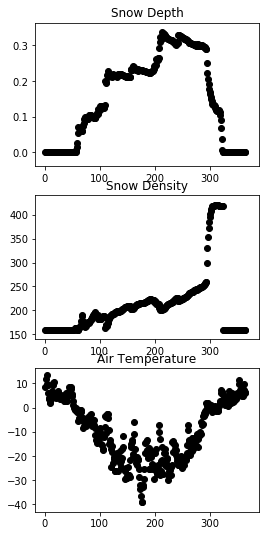

In [4]:
plt.figure(figsize=[4,9])
h0 = plt.subplot(3,1,1)
h1 = plt.subplot(3,1,2)
h2 = plt.subplot(3,1,3)

h0.title.set_text('Snow Depth')
h1.title.set_text('Snow Density')
h2.title.set_text('Air Temperature')

print('Air Temperature Unit:', ec.var_units('land_surface_air__temperature'))
print('Snow Depth Unit:'     , ec.var_units('snowpack__depth'))
print('Snow Density Unit:'   , ec.var_units('snowpack__mass-per-volume_density'))

for i in np.arange(365):
    
    ec.update()
    
    tair  = ec.get_value('land_surface_air__temperature')    
    snd   = ec.get_value('snowpack__depth', units='m')
    rsn   = ec.get_value('snowpack__mass-per-volume_density')
    
    units = ec.var_units('snowpack__depth')
    
    h0.scatter(ec.time, snd, c='k')    
    h1.scatter(ec.time, rsn, c='k')
    h2.scatter(ec.time,tair, c='k')
    
    
# ec.finalize()

### Comparison with Observations at Barrow

![Comparison](https://github.com/permamodel/Snow_BMI_Fortran/blob/master/data/Barrow.png?raw=true)